<a href="https://colab.research.google.com/github/amanmathur19/image-classification/blob/master/catergory_classification_medium.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.utils import to_categorical
from keras.preprocessing import image
from keras.optimizers import SGD
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from keras.utils import to_categorical
from tqdm import tqdm


In [30]:
train = pd.read_csv('/content/drive/Shared drives/New Markets/Aman/Project Neo/medium.csv')

In [31]:
train.columns

Index(['Unnamed: 0', 'upload_date', 'brand', 'cover_image_url', 'category'], dtype='object')

In [32]:
train['image_filename'] = train['cover_image_url'].apply((lambda x: x[-28:]))
train = train.drop(train.columns[0:3], axis = 1)
train = train.drop(train.columns[0:1], axis =1 )

In [33]:
train.head()

,category,image_filename
0,Dresses & Skirts,5e17d1919d3b78474d296d12.jpg
1,Dresses & Skirts,5e102444138e1891a5c72ecb.jpg
2,Dresses & Skirts,5e0e754d9e1559244942bd6e.jpg
3,Dresses & Skirts,5e11196de974fbb7c1039027.jpg
4,Dresses & Skirts,5e195b3693b46a0f0f3f4354.jpg


In [34]:
train['category'] = train['category'].apply(lambda x: x.replace(" ",""))
train.head()

,category,image_filename
0,Dresses&Skirts,5e17d1919d3b78474d296d12.jpg
1,Dresses&Skirts,5e102444138e1891a5c72ecb.jpg
2,Dresses&Skirts,5e0e754d9e1559244942bd6e.jpg
3,Dresses&Skirts,5e11196de974fbb7c1039027.jpg
4,Dresses&Skirts,5e195b3693b46a0f0f3f4354.jpg


In [39]:
train['category'].value_counts()

Dresses&Skirts     2500
Shoes              2500
Jackets&Blazers    2500
Handbags           2500
Name: category, dtype: int64

In [40]:
d = dict(zip(train['category'].unique(), range(0,4)))
d

{'Dresses&Skirts': 0, 'Handbags': 1, 'Jackets&Blazers': 2, 'Shoes': 3}

In [41]:
train['category'] =  train['category'].map(d,na_action = 'ignore')
train.drop(train.columns[0], axis=1)
train.head()

,category,image_filename
0,0,5e17d1919d3b78474d296d12.jpg
1,0,5e102444138e1891a5c72ecb.jpg
2,0,5e0e754d9e1559244942bd6e.jpg
3,0,5e11196de974fbb7c1039027.jpg
4,0,5e195b3693b46a0f0f3f4354.jpg


In [ ]:
# We have grayscale images, so while loading the images we will keep grayscale=True, if you have RGB images, you should set grayscale as False
train_image = []
for i in tqdm(range(train.shape[0])):
    try:
      img = image.load_img('/content/drive/Shared drives/New Markets/Aman/Project Neo/image-data-med/'+train['image_filename'][i], target_size=(56,56,3), grayscale=False)
    except Exception as e:
      print(e)
      continue
      # train.drop(train[train['image_filename'] == train['image_filename'][i]].index,axis = 0)

    img = image.img_to_array(img)
    img = img/255
    train_image.append(img)

X = np.array(train_image)



In [85]:
len(train_image)

8634

In [88]:
train = tr

,category,image_filename,flag
0,0,5e17d1919d3b78474d296d12.jpg,True
1,0,5e102444138e1891a5c72ecb.jpg,True
2,0,5e0e754d9e1559244942bd6e.jpg,True
3,0,5e11196de974fbb7c1039027.jpg,True
4,0,5e195b3693b46a0f0f3f4354.jpg,True


# New Section

In [89]:
y=train_cleaned['category'].values
y = to_categorical(y)

In [90]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.2)


In [ ]:
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),activation='relu',input_shape=(56,56,3)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(4, activation='softmax'))
model.compile(loss='categorical_crossentropy',optimizer='Adam',metrics=['accuracy'])


In [92]:
nets = 3
model = [0] *nets

for j in range(3):
    model[j] = Sequential()
    model[j].add(Conv2D(24,kernel_size=5,padding='same',activation='relu',
            input_shape=(56,56,3)))
    model[j].add(MaxPooling2D())
    if j>0:
        model[j].add(Conv2D(48,kernel_size=5,padding='same',activation='relu'))
        model[j].add(MaxPooling2D())
    if j>1:
        model[j].add(Conv2D(64,kernel_size=5,padding='same',activation='relu'))
        model[j].add(MaxPooling2D(padding='same'))
    model[j].add(Flatten())
    model[j].add(Dense(256, activation='relu'))
    model[j].add(Dense(4, activation='softmax'))
    model[j].compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"])
    # opt = SGD(lr=0.001, momentum=0.9)
    # model[j].compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
nets = 6
model = [0] *nets
for j in range(6):
    model[j] = Sequential()
    model[j].add(Conv2D(j*8+8,kernel_size=5,activation='relu',input_shape=(56,56,3)))
    model[j].add(MaxPooling2D())
    model[j].add(Conv2D(j*16+16,kernel_size=5,activation='relu'))
    model[j].add(MaxPooling2D())
    model[j].add(Flatten())
    model[j].add(Dense(256, activation='relu'))
    model[j].add(Dense(4, activation='softmax'))
    model[j].compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"])

In [93]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(6907, 56, 56, 3)
(6907, 4)
(1727, 56, 56, 3)
(1727, 4)


In [94]:
def summarize_diagnostics(history):
	# plot loss
	plt.subplot(211)
	plt.title('Cross Entropy Loss')
	plt.plot(history.history['loss'], color='blue', label='train')
	plt.plot(history.history['val_loss'], color='orange', label='test')
	# plot accuracy
	plt.subplot(212)
	plt.title('Classification Accuracy')
	plt.plot(history.history['accuracy'], color='blue', label='train')
	plt.plot(history.history['val_accuracy'], color='orange', label='test')

Epoch 1/100
216/216 [==============================] - 47s 217ms/step - loss: 1.1292 - accuracy: 0.5179 - val_loss: 0.9255 - val_accuracy: 0.6393
Epoch 2/100
216/216 [==============================] - 47s 217ms/step - loss: 0.7925 - accuracy: 0.6978 - val_loss: 0.8072 - val_accuracy: 0.6891
Epoch 3/100
216/216 [==============================] - 47s 219ms/step - loss: 0.6573 - accuracy: 0.7488 - val_loss: 0.7998 - val_accuracy: 0.7018
Epoch 4/100
216/216 [==============================] - 47s 220ms/step - loss: 0.5407 - accuracy: 0.7921 - val_loss: 0.7604 - val_accuracy: 0.7365
Epoch 5/100
216/216 [==============================] - 47s 220ms/step - loss: 0.4020 - accuracy: 0.8545 - val_loss: 0.8823 - val_accuracy: 0.7076
Epoch 6/100
216/216 [==============================] - 47s 218ms/step - loss: 0.2979 - accuracy: 0.8923 - val_loss: 0.9223 - val_accuracy: 0.7030
Epoch 7/100
216/216 [==============================] - 47s 218ms/step - loss: 0.1932 - accuracy: 0.9359 - val_loss: 1.0588 -

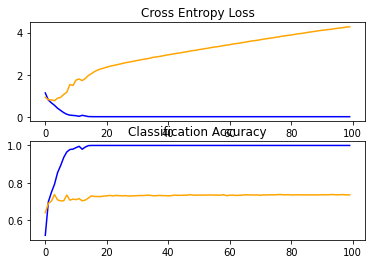

In [107]:
model_diag = model[1].fit(X_train, y_train, epochs=100, validation_data=(X_test, y_test))
summarize_diagnostics(model_diag)


In [108]:
test_image = []
img = image.load_img('/content/drive/Shared drives/New Markets/Aman/Project Neo/temp_2.jpg',target_size=(56,56,3), grayscale=False)
img = image.img_to_array(img)
img = img/255
test_image.append(img)
test = np.array(test_image)



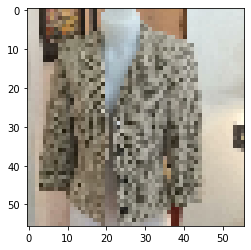

In [109]:
plt.imshow(img)

In [110]:
prediction = model[1].predict_classes(test)

In [111]:
prediction

array([0])

In [112]:
d

{'Dresses&Skirts': 0, 'Handbags': 1, 'Jackets&Blazers': 2, 'Shoes': 3}

## Checking Balance of dataset

In [58]:
 try:
      img_temp = image.load_img('/content/drive/Shared drives/New Markets/Aman/Project Neo/image-data-med/5e137b40b3e9171fb0ece02e.jpg', target_size=(56,56,3), grayscale=False)
except Exception as e:
      print(e)

[Errno 2] No such file or directory: '/content/drive/Shared drives/New Markets/Aman/Project Neo/image-data-med/5e137b40b3e9171fb0ece02e.jpg'


In [59]:
train.head()

,category,image_filename
0,0,5e17d1919d3b78474d296d12.jpg
1,0,5e102444138e1891a5c72ecb.jpg
2,0,5e0e754d9e1559244942bd6e.jpg
3,0,5e11196de974fbb7c1039027.jpg
4,0,5e195b3693b46a0f0f3f4354.jpg


In [63]:
train.drop(train[train['image_filename'] == '5e137b40b3e9171fb0ece02e.jpg'].index,axis = 0)


,category,image_filename
0,0,5e17d1919d3b78474d296d12.jpg
1,0,5e102444138e1891a5c72ecb.jpg
2,0,5e0e754d9e1559244942bd6e.jpg
3,0,5e11196de974fbb7c1039027.jpg
4,0,5e195b3693b46a0f0f3f4354.jpg
...,...,...
9995,3,5e1272e72cc51543596b6a61.jpg
9996,3,5e17dd7619c1572b80f1d8a8.jpg
9997,3,5e190bf821cd0a6ca2f3e09a.jpg
9998,3,5e1515fb318740ead388740a.jpg


In [66]:
import os
img_list = os.listdir("/content/drive/Shared drives/New Markets/Aman/Project Neo/image-data-med/")
len(img_list)

8643

In [67]:
train['flag'] = train['image_filename'].apply(lambda x: True if x in img_list else False)

In [71]:
train_cleaned = train[train['flag'] == True]
train_cleaned.head()

,category,image_filename,flag
0,0,5e17d1919d3b78474d296d12.jpg,True
1,0,5e102444138e1891a5c72ecb.jpg,True
2,0,5e0e754d9e1559244942bd6e.jpg,True
3,0,5e11196de974fbb7c1039027.jpg,True
4,0,5e195b3693b46a0f0f3f4354.jpg,True


In [72]:
train_cleaned.shape

(8634, 3)

In [76]:
train_cleaned['category'].value_counts()

0    2217
2    2179
3    2159
1    2079
Name: category, dtype: int64

In [78]:
len(train_image)

10000